# Bank Customer Churn Modeling 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Model6">Final Model</a></li>
<li><a href="#Insights">Model Insights</a></li>
<li><a href="#EDA">Exploratory Analysis</a></li> 
<li><a href="#BI">Business Impact</a></li> 
<li><a href="#conclusion">Conclusion
</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project, we have a Data Set of a Bank's customer base which contains attributes such as their credit score, gender, their location, Age, how long they've been with the bank etc. This dataset contains historical data of these customers and if they exited the bank. The Bank wants to identify people that are most likely to exit and reach out to them with offers so as to increase retention. 
Logistic Regression is one of the most widely used models for two class classification problems like these. It is easily interpretable and easy to solve. 
We will build a Logistic Regression model to identify these customers with a high propensity to quit the Bank based on their characteristics.

### Variables Description
> <li> CustomerID : Unique Identifier for each customer.(Number)
<li> Surname : Customer Name.(String)
<li> CreditScore : Customer's Credit Score.(Integer)
<li> Geography : The customers in this dataset hail from three countries, Germany, France, Spain.(String)
<li> Gender : Gender of customer (two categories).
<li> Age : Age of Customer in years. (Integer)
<li> Tenure : Number of years the customer has stayed with the Bank. (Integer)
<li> Balance : Customer's current account balance. (Continuous, Float)
<li> NumofProducts : Number of products or offers the customer has with the bank. For example, a credit card, a Debit card, a checking account, savings account etc. (Integer)
<li> HasCrCard : Indicator whether the customer has a credit card with the Bank. (Binary)
<li> IsActiveMember : Indicator of whether a customer frequently uses the bank for transactions and other purposes. (Binary)
<li> EstimatedSalary : The estimated salary of the customer in $. (Continuous, Float)
<li> Exited : Independent variable that we try to predict i.e if the customer is probable to exit the Bank. (Binary)

### Data Manipulation 
> We have two nominal categorical variables, Geography and Gender. For any algorithm to understand this, we need to create dummy variables that represent these categorical variables. Hence we create three columns for Geography, and two for Gender. However, it is known that for n dummy variables the model should include n-1 dummy variables considering the dropped out dummy variable as the baseline. In our case, lets drop France from Geography considering it a baseline and drop Male from Gender considering it as baseline. Thus the interpretation of coefficients for the remaining dummy variables will be in relation to their respective baselines.

### Feature Selection and Model Building
> We can build our model using all the features, but this presents a problem of noise where some features not actually contributing to our output may simply worsen our model's predictive abilites. There are many ways to solve this problem of feature selection. Here we use recursive feature elimination based on the model's  $R^{2}$ value and significance (P-value with a cutoff of 0.05) of each feature weight. We iterate through each feature and eliminate the unnecessary ones.



In [5]:
import pandas as pd
import numpy as np
df0=pd.read_csv('Churn-Modelling.csv')
df0['Female']=pd.get_dummies(df0['Gender'])['Female']#creating dummy variables for Gender.
df0[['Germany','Spain']]=pd.get_dummies(df0['Geography'])[['Germany','Spain']]#creating dummy variables for geography
df0.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,1


In [6]:
#headers=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Germany','Spain','Exited']


df0.drop(['Gender','Geography'],axis=1,inplace=True)#Dropping Gender and Geography
df0=df0[['RowNumber','CustomerId','Surname','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Female','Germany','Spain','Exited']]#reordering columns
df0.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Germany,Spain,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,1,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,1,0,1,0
5,6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,0,0,1,1
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,0,0,0
7,8,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,1,0,1
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,0,0,0
9,10,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,0,0,0,0


## Model 1
> We start by including all variables in the analysis, eliminate the variable with the highest P-value and rerun the model, all the while keeping an eye on the $R^{2}$ Value and model accuracy.

In [36]:
# All inclusive
#Model 1
df0['intercept']=1
X=df0.drop(['Exited','RowNumber','CustomerId','Surname'],axis=1)

y=df0['Exited']

#Logit Fitting
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
lm=sm.Logit(y,X)
result=lm.fit()
print(result.summary())

#creating new dataframe
dft=df0.copy()

dft['predictions']=result.predict(X)

pred=[]
q=0.5
for _ in dft['predictions']:
    if _ > q:
        e=1
    else:
        e=0
    pred.append(e)
    
dft['predicted']=pred

points=[]
for _ in dft.index:
    if dft['Exited'][_]== dft['predicted'][_]:
        e=1
    else:
        e=0
    points.append(e)
        



dft['correct']=points  
print('Model Accuracy : ',np.mean(points))
print('Model Goodness of Fit : ',result.prsquared)



Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1532
Time:                        13:44:18   Log-Likelihood:                -4280.7
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0007      0.000     -2.384      0.017      -0.001      -0.000
Age           

>Model Accuracy :  0.8103  

>Model Goodness of Fit :  0.15316127403897883

> The highest P-value was that of Spain. This means that the Spanish do not have a significant difference in the way they behave with respect to their French counterparts.

## Model 2

> We eliminate Spain and re-run our model.


In [35]:
# Spain Dropped
df0['intercept']=1
X=df0.drop(['Exited','RowNumber','CustomerId','Surname','Spain'],axis=1)

y=df0['Exited']

#Logit Fitting
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
lm=sm.Logit(y,X)
result=lm.fit()
print(result.summary())

#creating new dataframe
dft=df0.copy()

dft['predictions']=result.predict(X)

pred=[]
q=0.5
for _ in dft['predictions']:
    if _ > q:
        e=1
    else:
        e=0
    pred.append(e)
    
dft['predicted']=pred

points=[]
for _ in dft.index:
    if dft['Exited'][_]== dft['predicted'][_]:
        e=1
    else:
        e=0
    points.append(e)
        
        



dft['correct']=points  

print('Model Accuracy : ',np.mean(points))
print('Model Goodness of Fit : ',result.prsquared)


    

Optimization terminated successfully.
         Current function value: 0.428080
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1531
Time:                        13:44:12   Log-Likelihood:                -4280.8
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0007      0.000     -2.378      0.017      -0.001      -0.000
Age           

>Model Accuracy :  0.81 ,

>Model Goodness of Fit :  0.15313673792714932

>The highest P- value here was that of HasCrCard, we can say that possessing a credit card does not have a significant effect on the probability of the customer to quit the Bank.

## Model 3

We eliminate HasCrCard

In [34]:
# Credit Card Removed
df0['intercept']=1
X=df0.drop(['Exited','RowNumber','CustomerId','Surname','Spain','HasCrCard'],axis=1)

y=df0['Exited']

#Logit Fitting
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
lm=sm.Logit(y,X)
result=lm.fit()
print(result.summary())

#creating new dataframe
dft=df0.copy()

dft['predictions']=result.predict(X)

pred=[]
q=0.5
for _ in dft['predictions']:
    if _ > q:
        e=1
    else:
        e=0
    pred.append(e)
    
dft['predicted']=pred

points=[]
for _ in dft.index:
    if dft['Exited'][_]== dft['predicted'][_]:
        e=1
    else:
        e=0
    points.append(e)
        



dft['correct']=points  
print('Model Accuracy : ',np.mean(points))
print('Model Goodness of Fit : ',result.prsquared)



Optimization terminated successfully.
         Current function value: 0.428109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1531
Time:                        13:44:06   Log-Likelihood:                -4281.1
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0007      0.000     -2.369      0.018      -0.001      -0.000
Age           

>Model Accuracy :  0.8111

>Model Goodness of Fit :  0.1530801744050173

>Estimated salary has the highest P-value, we can say that this does not have an influence over the customer's propensity to quit.

## Model 4

> We eliminate EstimatedSalary and re-run the model.

In [33]:
# EstimatedSalary Removed
df0['intercept']=1
X=df0.drop(['Exited','RowNumber','CustomerId','Surname','Spain','HasCrCard','EstimatedSalary'],axis=1)

y=df0['Exited']

#Logit Fitting
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
lm=sm.Logit(y,X)
result=lm.fit()
print(result.summary())

#creating new dataframe
dft=df0.copy()

dft['predictions']=result.predict(X)

pred=[]
q=0.5
for _ in dft['predictions']:
    if _ > q:
        e=1
    else:
        e=0
    pred.append(e)
    
dft['predicted']=pred

points=[]
for _ in dft.index:
    if dft['Exited'][_]== dft['predicted'][_]:
        e=1
    else:
        e=0
    points.append(e)
        



dft['correct']=points  
print('Model Accuracy : ',np.mean(points))
print('Model Goodness of Fit : ',result.prsquared)



Optimization terminated successfully.
         Current function value: 0.428161
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1530
Time:                        13:44:01   Log-Likelihood:                -4281.6
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CreditScore       -0.0007      0.000     -2.378      0.017      -0.001      -0.000
Age              

> Model Accuracy :  0.8115

> Model Goodness of Fit :  0.15297782224426926

> Tenure is almost close to our cutoff P-value of 0.05, lets eliminate it and check how our model performs.

## Model 5

> We eliminate Tenure and re-run our model.

In [32]:
# Tenure Removed
df0['intercept']=1
X=df0.drop(['Exited','RowNumber','CustomerId','Surname','Spain','HasCrCard','EstimatedSalary','Tenure'],axis=1)

y=df0['Exited']

#Logit Fitting
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
lm=sm.Logit(y,X)
result=lm.fit()
print(result.summary())

#creating new dataframe
dft=df0.copy()

dft['predictions']=result.predict(X)

pred=[]
q=0.5
for _ in dft['predictions']:
    if _ > q:
        e=1
    else:
        e=0
    pred.append(e)
    
dft['predicted']=pred

points=[]
for _ in dft.index:
    if dft['Exited'][_]== dft['predicted'][_]:
        e=1
    else:
        e=0
    points.append(e)
        



dft['correct']=points  
print('Model Accuracy : ',np.mean(points))
print('Model Goodness of Fit : ',result.prsquared)


Optimization terminated successfully.
         Current function value: 0.428307
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1527
Time:                        13:43:54   Log-Likelihood:                -4283.1
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CreditScore       -0.0007      0.000     -2.377      0.017      -0.001      -0.000
Age              

> Model Accuracy :  0.8112

> Model Goodness of Fit :  0.15268856243812112

> Our model accuracy has gone down from 0.1539 to 0.1526 which means that the there is a loss of information from the elimination of Tenure. Though Tenure does not have high weight, it does have an influence on whether the customer will quit or not. So we include Tenure for our final model.

<a id='Model6'></a>
## Model 6

> We include tenure and re-run the model.This will be our final model used for predicting the potential churns.

In [84]:
df0['intercept']=1
X=df0.drop(['Exited','RowNumber','CustomerId','Surname','Spain','HasCrCard','EstimatedSalary'],axis=1)

y=df0['Exited']

#Logit Fitting
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
lm=sm.Logit(y,X)
result=lm.fit()
print(result.summary())

#creating new dataframe
dft=df0.copy()

dft['predictions']=result.predict(X)

pred=[]
q=0.5
for _ in dft['predictions']:
    if _ > q:
        e=1
    else:
        e=0
    pred.append(e)
    
dft['predicted']=pred

points=[]
for _ in dft.index:
    if dft['Exited'][_]== dft['predicted'][_]:
        e=1
    else:
        e=0
    points.append(e)
        



dft['correct']=points  
print('Model Accuracy : ',np.mean(points))
print('Model Goodness of Fit : ',result.prsquared)

pc_ac=dft[(dft['Exited']==1)&(dft['predicted']==1)].Exited.count()
pc_anc=dft[(dft['Exited']==0)&(dft['predicted']==1)].Exited.count()
pnc_ac=dft[(dft['Exited']==1)&(dft['predicted']==0)].Exited.count()
pnc_anc=dft[(dft['Exited']==0)&(dft['predicted']==0)].Exited.count()

cf={'Pred_No':[pnc_anc,pnc_ac],'Pred_Yes':[pc_anc,pc_ac]}
cfm=pd.DataFrame(data=cf)
odds_ratio=pd.DataFrame(np.exp(result.params)).drop('intercept')
fimportance=pd.DataFrame(abs(1-np.exp(result.params.drop('intercept'))))
cm = sns.light_palette("red", as_cmap=True)

s = odds_ratio.style.background_gradient(cmap=cm)
ranks=pd.DataFrame(fimportance.rank(axis=0,ascending=False))
from IPython.display import display
display(s)
display(ranks)
display(cfm)

Optimization terminated successfully.
         Current function value: 0.428161
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:                  0.1530
Time:                        17:31:53   Log-Likelihood:                -4281.6
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CreditScore       -0.0007      0.000     -2.378      0.017      -0.001      -0.000
Age              

,0
CreditScore,0.999334
Age,1.07541
Tenure,0.984143
Balance,1
NumOfProducts,0.904408
IsActiveMember,0.341266
Female,1.6972
Germany,2.14268


,0
CreditScore,7.0
Age,5.0
Tenure,6.0
Balance,8.0
NumOfProducts,4.0
IsActiveMember,3.0
Female,2.0
Germany,1.0


,Pred_No,Pred_Yes
0,7676,287
1,1598,439


<a id='Interpretation'></a>
## Model Intepretation
> Model Accuracy :  0.8115

> Model Goodness of Fit :  0.15297782224426926

> Model Performance : Our model has an accuracy of 81.15% at predicting customer churn, and pseudo $R^{2}$ of 0.153 which is the best among the 6 models we have run so far.

> The final features the model has chosen are : 
<li> Credit Score
<li> Age
<Li> Tenure
<li> Balance
<li> Number of Products
<li> Is Active Member
<li> Female
<li> Germany

<a id='Insights'></a>
## Model Insights
> The model has chosen the above mentioned features as the most important ones that affect whether or not our customer will quit the Bank. Let us go over each variable and interpret their coefficients and odds-ratio in view of their effects on churn.

> Before we interpret the coefficients, lets familiarize ourselves with odds ratio. Odds ratio is the ratio of probability  of an event happening to the probability of the even not happening $p/(1-p)$. In a sense it tells us how strong the probability of the event happening is, than not happening. If the the probability of event happening is $0.5$ then probability of event not happening is $1 - 0.5 = 0.5$ . The odds ratio in this case is $0.5/0.5 = 1$. It tells us that the event is as likely to happen as it is to not happen. We can establish here that the closer the odds ratio is to 1, the less significant is the associated variable in determining the dependent output variable in our regression model.

> In light of the above interpretation of the odds ratio, we will only discuss the variables in our model whose odds ratio are much farther away from 1 on either side. From our variables, the odds ratio associated with Germany, Female and Is Active Member come out to be the ones with odds ratio farthest from 1.


 
> <li> Germany : With an odds ratio of 2.14, it seems like the Germans are more than twice as likely as the French to quit the Bank. This can mean many things, it can mean that our customer service in Germany is not good, or that there is a new competitor Bank in Germany that is enticing our customers with promotional offers better than what we are offering them. A seperate analysis can be done to find out what is going on in Germany.

> <li> Female : The Female population in our customer base are 70% more likely to quit than our male customers. We have to perform a root cause analysis to find out what is causing this. One solution can be to come up with female targeted special offers, such as higher interest rates, or cashback offers. Another innovative solution could be to introduce special offers for spouse joint accounts. Since we have established that Males are more likely to stay, if we promote joint spouse accounts where we give them higher interest rates for creating an account with their female spouse, we can ensure that the female is less likely to leave given that her husband is with the Bank.

> <li> Is Active Member : The odds ratio for this variable is to the left of 1 on the number line. It means that this variable actually favours us in retaining the customer. It says that an active member is about 70% less likely to quit the bank than those that are not active members. We can act upon this insight and promote our customer engagement to increase their activity with our Bank. This too involves cashback offers and customer loyalty rewards to improve retention and bring down the odds ratio associated with this variable.


<a id='EDA'></a>
## Exploratory Analysis

> From our model above we discovered some insights about the variables affecting Churns. Let us now perform some exploratory Data Analysis to simply explore our customer base further to generate some insight that may not be necessarily related to churn. We are basically trying to understand our customer base better so that our campaigns can be more effective.

> Let us begin by looking at correlations between the various variables. 

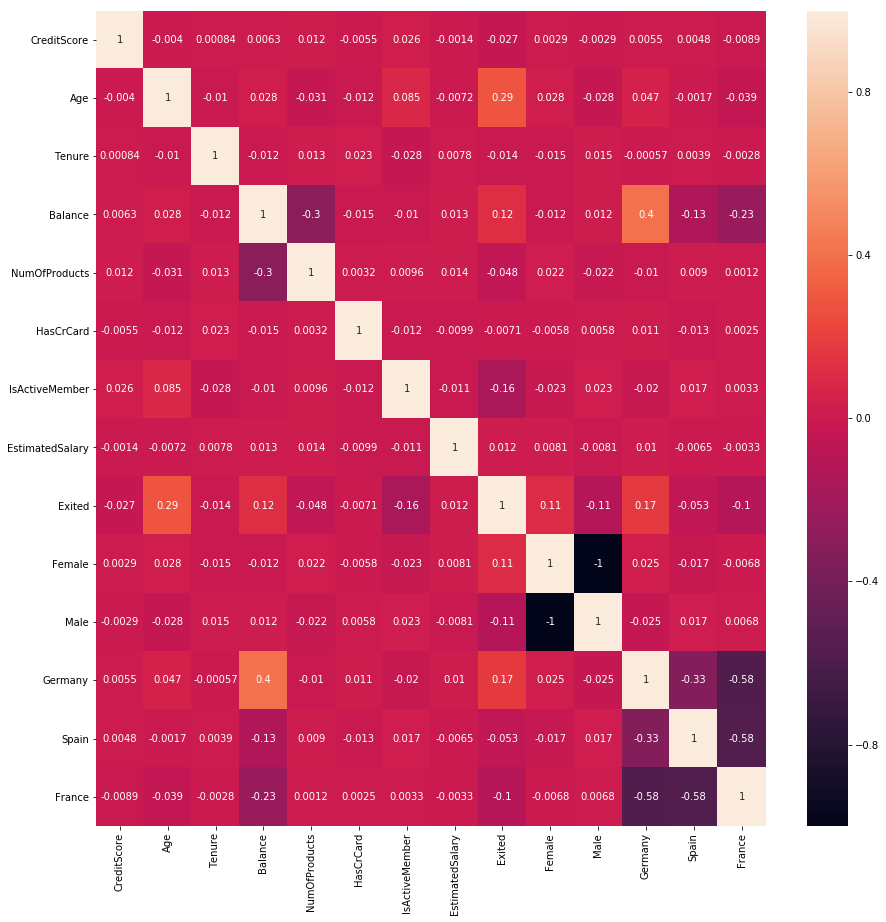

In [62]:
alla=pd.read_csv('Churn-Modelling.csv')
alla[['Female','Male']]=pd.get_dummies(alla['Gender'])[['Female','Male']]
alla[['Germany','Spain','France']]=pd.get_dummies(alla['Geography'])[['Germany','Spain','France']]
alla.head()
alla.drop(['Gender','Geography'],axis=1,inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

sns.heatmap(alla.drop(['RowNumber','CustomerId'],axis=1).corr(),annot=True)

plt.show()

> The above heatmap shows interrelationships that exist between the variables. It can be interpreted based on color scale. The most significant ones here are the correlationships between Germany and Balance,Germany and Exited, Age and Exited. These numbers, although not very high in the correlation scale, are the highest among the correlations here. They are infact consistent with our regression model.

### Mean balance and salaries across countries

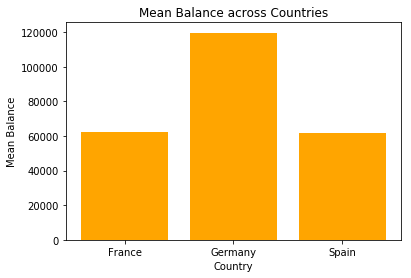

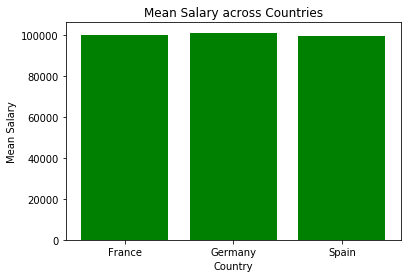

In [66]:
af=pd.read_csv('Churn-Modelling.csv')
bal=pd.DataFrame(af.groupby(af['Geography'])['Balance'].mean())
bal['geo']=bal.index
plt.bar(bal['geo'],bal['Balance'],color='orange')
plt.xlabel('Country')
plt.ylabel('Mean Balance')
plt.title('Mean Balance across Countries')
plt.show()


sal=pd.DataFrame(af.groupby(af['Geography'])['EstimatedSalary'].mean())
bal['geo']=bal.index
plt.bar(bal['geo'],bal['EstimatedSalary'],color='green')
plt.xlabel('Country')
plt.ylabel('Mean Salary')
plt.title('Mean Salary across Countries')
plt.show()

> We see from the plot above that, while the mean balance in Germany (120,000) is significantly higher than the other countries(60,000), the mean salary in all countries are the same (100,000). This can tell us many things about the German, French and Spanish's spending habits. 

>The Germans tend to keep more of their savings in the bank than the others. 

>This can either mean that the Germans are much more conservative in terms of spending their money and favour saving more than their French and Spanish counterparts, or it can also mean that the French and Spanish favour other ways of investing or saving money than the traditional bank savings. 

>The other explanation can also be that German interest rates are higher than the other two countries, thus attracting more Germans to keep their money in the bank than to invest in say the stock market.

>All these are possible explanations which can be explored by gathering more relevant data.

### Mean ages of churns and no churns

> We saw in our heatmap that there was some correlation between the age and churns. We compare the mean age of churns and no churns visually. The below Bar plot clearly indicates that the mean age of churns is around 38 whereas the mean age of no churns in around 45. This also appears as a factor affecting the exit odds ratio in our regression analysis where we found that for every one year increase in age of the customer, there is a 7% increase in odds ratio of exiting.

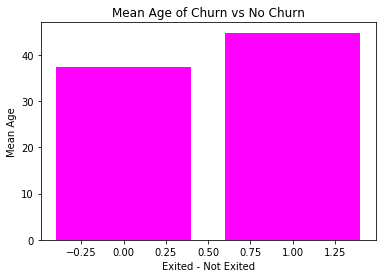

In [67]:
exit=pd.DataFrame(af.groupby(af['Exited'])['Age'].mean())
exit['ages']=exit.index
plt.bar(exit['ages'],exit['Age'],color='magenta')
plt.xlabel('Exited - Not Exited')
plt.ylabel('Mean Age')
plt.title('Mean Age of Churn vs No Churn')
plt.show()

<a id='BI'></a>

## Business Impact 

> The analysis has a significant impact on the finances of the bank. It has bought down the marketing costs, while identifying a huge chunk of the customer base with millions in balance and highly probable to exit.

>To more accurately measure the model's impact on the costs, we conduct a CAP analysis. This is explained in detail below.

### Cumulative Accuracy Profile (CAP) Analysis

> CAP analysis is used to measure any binary classification model's performance specifically in comparision to a random selection model. What this means in our context is that, we  know that 20% of our customers are churns. To avoid churns, the bank wants to give promotional offers to probable churns. It wants to select the most probable churns to send these offers to. We also want to approach as few people as possible while increasing the number of churns we reach among the people we reach out to. In a random selection, the number of churns we reach is proportional to the number of total people we reach. For example, if we reach out to a 100 people we will have obtained about 20 potential churns (20% of the population). We want to reduce the ratio of the total people we reach out to to the total churns we find. This metric can be measured from the CAP analysis. The CAP plot plots total percentage of people approached on the X-axis and the percentage of churns approached on the Y-axis. It also has the random selection model plot which is basically a straight line with slope 1. Our model performance is the ratio of area under the CAP curve to the area of the perfect plot which is an ideal plot where number of people approached is equal to number of churns reached. Thus the CAP curve is a powerful technique to measure our model's effectiveness in reaching our target group.


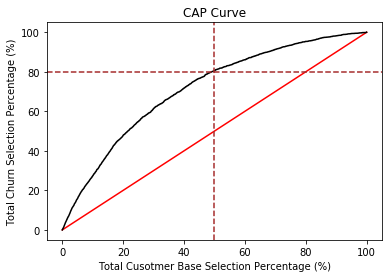

Accuracy Ratio :  0.5937145316601531
Potential Churn Value : $ 50080127.74000003


In [80]:
#CAP Analysis

#Creating CAP Analysis Table

cap=dft[['RowNumber','Exited','predictions']]
cap=cap.sort_values(by='predictions',ascending=False)
cap['ind']=np.arange(cap.shape[0])+1

total_exited=cap['Exited'].sum()
pct_exited=total_exited/cap['RowNumber'].count()
cap['TotalSelection']=cap.ind
cap['TotalSelectPercent']=cap['TotalSelection']/cap.shape[0]
cap['RandomSelection']=cap['TotalSelection']*pct_exited
cap['RandomSelectPct']=cap['RandomSelection']/total_exited
mds=[]
for i in cap['ind']:
    mds.append(cap['Exited'][:i].sum())
cap['ModelSelection']=mds
cap['ModelSelectPct']=cap['ModelSelection']/total_exited

#Plotting CAP Curve
x=cap['TotalSelectPercent']*100
y1=cap['RandomSelectPct']*100
y2=cap['ModelSelectPct']*100
plt.plot(cap['TotalSelectPercent']*100,cap['RandomSelectPct']*100,'r',cap['TotalSelectPercent']*100,cap['ModelSelectPct']*100,'black')
plt.xlabel('Total Cusotmer Base Selection Percentage (%)')
plt.ylabel('Total Churn Selection Percentage (%)')
plt.title('CAP Curve')
plt.axvline(50,color='brown',linestyle='--')
plt.axhline(80,color='brown',linestyle='--')
#plt.fill_between(x,y1,y2)
plt.show()

#Calculating Area under CAP curve
from sklearn.metrics import roc_auc_score
# here m is the churn percentage of the total customer base
A=-1;m=0.1;
B=1; n=1
C=0
au_perfect=0.5*(1/np.sin(3.14/4))*((A*m)+(B*n)+C)/np.sqrt((A**2)+(B**2)) #Area of Triangle of perfect Curve.
auc=roc_auc_score(cap['Exited'],cap['predictions'])-0.5
Accuracy_Ratio=auc/au_perfect
print('Accuracy Ratio : ',Accuracy_Ratio)

potential_churn=dft[(dft['predicted']==1)&(dft['correct']==1)].Balance.sum()
print('Potential Churn Value : $',potential_churn)


>The above CAP curve gives us an estimate of our model effectiveness. The accuracy ratio is about 60%, which means that we are at 60% of the ideal most accurate model.

>In terms of cost savings, suppose we want to reduce marketing cost by 50%, we can reach out to only 50% of our population saving the marketing costs by 50%.
> Lets check how much of our churn base we reach out to if we approach only 50% of our customers. Drawing a vertical line at the 50% mark on X-axis and projecting its intersection with the CAP curve to the Y-axis, we find that we have reached 80% of our churn base. That looks like a significant increase in churn outreach by 30% in comparision to the random selection model.

> Finally our model has correctly identified churn base that is worth $ 50,000,000 which is of significant business impact


<a id='conclusion'></a>
## Conclusion

> The analysis gave a lot of insights into the customer population and behaviour and did a good job at predicting churns. Below are some of the important ones :

><li> German customers are twice as likely to quit the bank as the French. This may mean bad customer service, or new competitor in the market.

><li> Female customers are 70% more likely to quit than Males. This problems needs to be further analysed to find the cause.One solution can be to come up with female targeted special offers, such as higher interest rates, or cashback offers. Another innovative solution could be to introduce special offers for spouse joint accounts. Since we have established that Males are more likely to stay, if we promote joint spouse accounts where we give them higher interest rates for creating an account with their female spouse, we can ensure that the female is less likely to leave given that her husband is with the Bank.

><li>  An active member is about 70% less likely to quit the bank than those that are not active members. We can act upon this insight and promote our customer engagement to increase their activity with our Bank. This too involves cashback offers and customer loyalty rewards to improve retention and bring down the odds ratio associated with this variable.

><li> While the mean balance in Germany (120,000) is significantly higher than the other countries(60,000), the mean salary in all countries are the same (100,000). This can tell us many things about the German, French and Spanish's spending habits. The Germans tend to keep more of their savings in the bank than the others. This can either mean that the Germans are much more conservative in terms of spending their money and favour saving more than their French and Spanish counterparts, or it can also mean that the French and Spanish favour other ways of investing or saving money than the traditional bank savings.
The other explanation can also be that German interest rates are higher than the other two countries, thus attracting more Germans to keep their money in the bank than to invest in say the stock market.All these are possible explanations which can be explored by gathering more relevant data.

><li> The analysis has the potential to save millions in balance for the bank. We identified $ 50,000,000 worth of churn customers. Additionaly we optimized the marketing campaign by more accurately identifying churn base effectively performing at 60 percent of the ideal model.
